In [29]:
import numpy as np
from scipy import spatial
import pandas as pd
from skimage import io, morphology
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from sklearn import metrics
from calc_lifetimes import calculate_lifetimes

%matplotlib inline

In [2]:
neuron1 = io.imread('/Users/hoermann/Desktop/TLI_project/Analysis/Final_Neurons/211104_P36_N2_R270_mask.tif')
neuron2 = io.imread('/Users/hoermann/Desktop/TLI_project/Analysis/Final_Neurons/211114_P36_N3_FlipV_R250_JE_mask.tif')

In [3]:
neuron1_lifetimes = calculate_lifetimes(neuron1)
neuron2_lifetimes = calculate_lifetimes(neuron2)

100%|███████████████████████████████████████████| 92/92 [00:04<00:00, 19.17it/s]


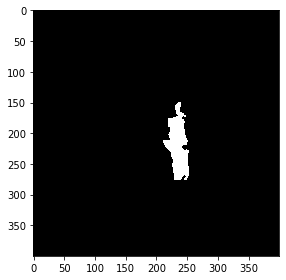

In [4]:
io.imshow(neuron1_lifetimes[0,20,:,:])

In [5]:
neuron1_stable = neuron1_lifetimes.copy()
neuron1_stable[(neuron1_stable < 4) * (neuron1_stable > 0)] = 1
neuron1_stable[neuron1_stable > 3] = 2
neuron1_stable = np.int16(neuron1_stable)

In [6]:
neuron2_stable = neuron2_lifetimes.copy()
neuron2_stable[(neuron2_stable < 4) * (neuron2_stable > 0)] = 1
neuron2_stable[neuron2_stable > 3] = 2
neuron2_stable = np.int16(neuron2_stable)

In [31]:
neuron1_coord = np.argwhere(neuron1_stable == 2)
neuron2_coord = np.argwhere(neuron2_stable == 2)

In [8]:
neuron1_coord[:10]

array([[  3,  13, 245, 237],
       [  3,  13, 245, 238],
       [  3,  13, 246, 237],
       [  3,  14, 240, 237],
       [  3,  14, 241, 237],
       [  3,  14, 242, 236],
       [  3,  14, 242, 237],
       [  3,  14, 242, 238],
       [  3,  14, 242, 239],
       [  3,  14, 243, 236]])

In [32]:
n1_entry_point = np.array([0,16,240,240])
n2_entry_point = np.array([0,28,260,200])

In [33]:
neuron1_coord = neuron1_coord - n1_entry_point
neuron2_coord = neuron2_coord - n2_entry_point

In [46]:
neuron1_coord[:,3] = neuron1_coord[:,3] /0.644
neuron2_coord[:,3] = neuron2_coord[:,3] /0.644

In [47]:
neuron1_coord[0]

array([ 3, -3,  5, -4])

In [48]:
neuron1_test = np.round(np.rad2deg(np.arctan2(neuron1_coord[:,2], neuron1_coord[:,3])))
neuron2_test = np.round(np.rad2deg(np.arctan2(neuron2_coord[:,2], neuron2_coord[:,3])))

In [49]:
neuron1_angles = pd.DataFrame()
neuron2_angles = pd.DataFrame()

In [50]:
neuron1_angles['angles'] = np.linspace(-180,180,361)
neuron1_angles = neuron1_angles.set_index('angles')
neuron2_angles['angles'] = np.linspace(-180,180,361)
neuron2_angles = neuron2_angles.set_index('angles')

In [51]:
for i in tqdm.tqdm(range(3,neuron1.shape[0])):
    angles = np.histogram(neuron1_test[neuron1_coord[:,0] == i], bins=np.linspace(-180,181,362))
    neuron1_angles[i] = angles[0]
    
for i in tqdm.tqdm(range(3,neuron2.shape[0])):
    angles = np.histogram(neuron2_test[neuron2_coord[:,0] == i], bins=np.linspace(-180,181,362))
    neuron2_angles[i] = angles[0]

100%|███████████████████████████████████████████| 90/90 [00:01<00:00, 58.33it/s]


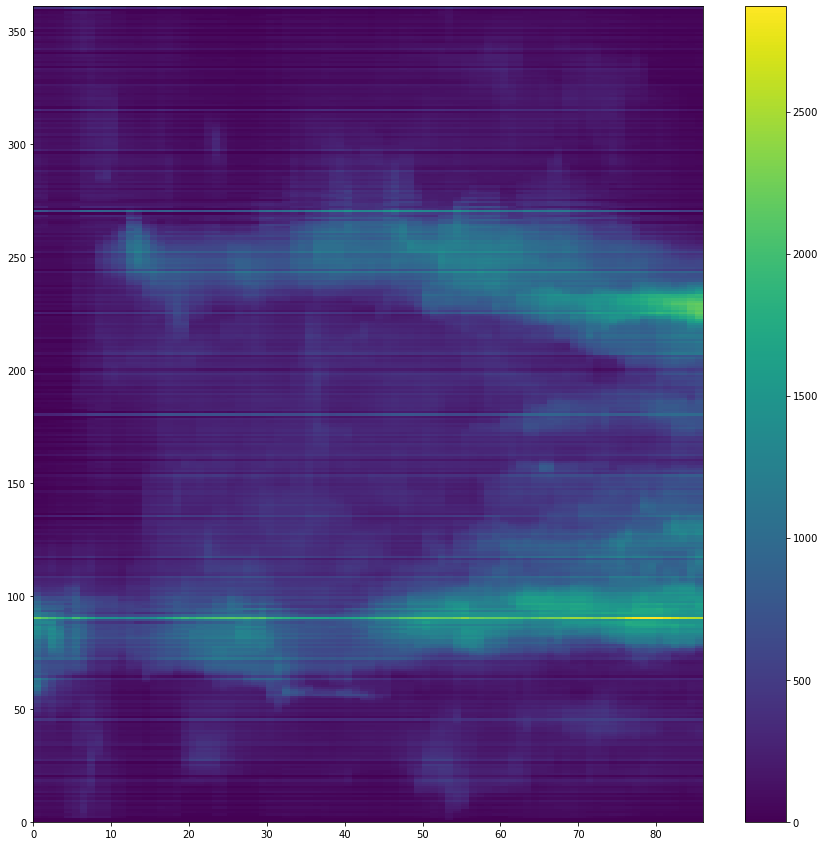

In [52]:
fig, ax = plt.subplots(figsize=(15,15))

ax.pcolormesh(neuron1_angles)
fig.colorbar(ax.pcolormesh(neuron1_angles))


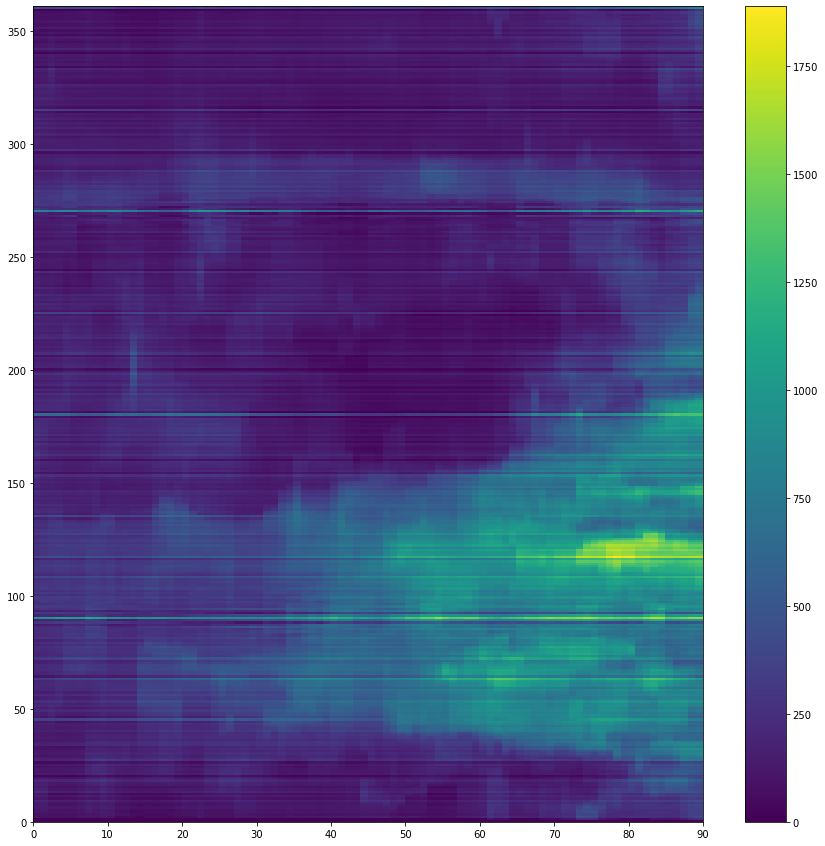

In [53]:
fig, ax = plt.subplots(figsize=(15,15))

ax.pcolormesh(neuron2_angles)
fig.colorbar(ax.pcolormesh(neuron2_angles))


In [20]:
neuron1_angles

,3,4,5,6,7,8,9,10,11,12,...,79,80,81,82,83,84,85,86,87,88
angles,,,,,,,,,,,,,,,,,,,,,
-180.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-179.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-178.0,0,0,0,0,0,30,54,22,12,11,...,0,0,0,0,0,0,0,0,0,0
-177.0,12,12,18,19,99,112,122,95,91,92,...,0,0,0,0,4,2,0,0,0,0
-176.0,80,72,75,75,95,109,131,110,96,96,...,60,42,34,34,37,36,35,35,33,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176.0,79,71,73,74,97,108,122,113,95,95,...,44,34,34,34,37,35,35,35,35,36
177.0,11,11,20,20,83,111,114,90,87,87,...,1,1,1,1,3,2,2,2,2,3
178.0,0,0,0,0,0,23,48,26,5,5,...,0,0,0,0,0,0,0,0,0,0


(array([  33.,   22.,   25.,   19.,   32.,   35.,   12.,   41.,    9.,
          28.,   54.,   29.,   45.,   45.,  111.,   25.,   47.,   74.,
          79.,   83.,   83.,   79.,   19.,  193.,   91.,   99.,  102.,
         105.,  117.,   65.,  165.,  102.,  138.,  135.,  115.,  159.,
         126.,  159.,  139.,  148.,   52.,  443.,   63.,  165.,  156.,
         213.,  216.,  266.,  245.,  278.,  290.,  234.,  302.,  175.,
         238.,  200.,  190.,  171.,  156.,  334.,   67.,  153.,  190.,
         210.,  229.,  233.,  197.,  136.,  326.,  236.,  225.,  209.,
         251.,  280.,  229.,  356.,  424.,  870., 1299., 1600., 1823.,
        2020., 2100., 2107., 2185., 2288., 2538., 2342., 2276.,    0.,
        2292., 2362., 2389., 2278., 2140., 1989., 1878., 1381., 1385.,
        1322., 1516., 1489., 1535., 1579., 1633., 1785., 1373., 1485.,
        1391., 1387., 1412., 1395., 1485., 1245., 1917., 1514., 1443.,
        1391., 1256., 1218., 1016.,  989.,  893.,  910.,  864.,  780.,
      

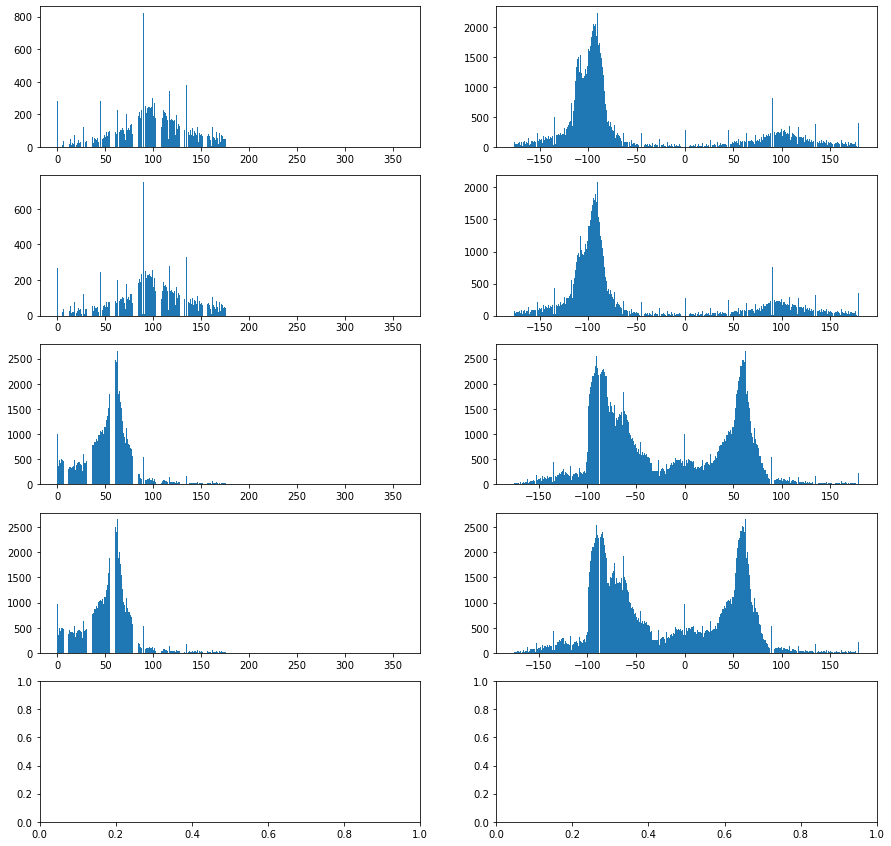

In [30]:
fig, ax = plt.subplots(5,2, figsize=(15,15))
ax[0,0].bar(neuron1_angles.index, neuron1_angles[3])
ax[0,1].hist(neuron1_test[neuron1_coord[:,0] == 3], bins=360)

ax[1,0].bar(neuron1_angles.index, neuron1_angles[4])
ax[1,1].hist(neuron1_test[neuron1_coord[:,0] == 4], bins=360)

ax[2,0].bar(neuron1_angles.index, neuron1_angles[87])
ax[2,1].hist(neuron1_test[neuron1_coord[:,0] == 87], bins=360)

ax[3,0].bar(neuron1_angles.index, neuron1_angles[88])
ax[3,1].hist(neuron1_test[neuron1_coord[:,0] == 88], bins=360)


In [ ]:
np.rad2deg(np.arctan2(0,1))

In [ ]:
np.linspace(-180,180,19)

In [ ]:
plt.hist(np.ravel(neuron1_stable[np.nonzero(neuron1_stable)]))

In [ ]:
np.array(neuron1_angles)

In [ ]:
io.imshow()